In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [34]:
import numpy as np
# from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [29]:
from typing import Callable, Dict, List

### Tabular structure art

In [3]:
def cross_matrix(n=10, seed=None):
    if seed:
        np.random.seed(seed)
    matrix =  np.zeros((n, n))
    matrix[np.random.randint(n), :] = 1
    matrix[:, np.random.randint(n)] = 1
    return matrix

In [5]:
cross_matrix()

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

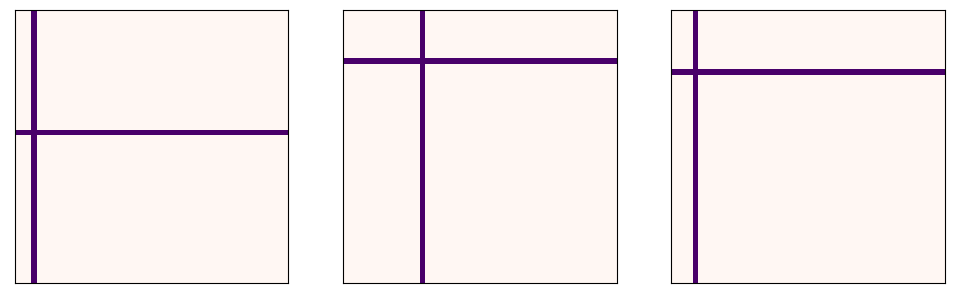

In [13]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
axs = ax.ravel()

for a in axs:
    a.imshow(cross_matrix(n=50), cmap='RdPu')
    a.xaxis.set_visible(False)
    a.yaxis.set_visible(False)

### Ambient

In [51]:
from pyambient import generate_noise_arr, generate_pattern_array

Available 'brushes' are 

REgular patterns:
- waves (wave like patterns)
- spheres (concentric circles)
- checkerboard 

Noise based 
- perlin
- simplex2
- worley/cellular nois


#### perlin noise generator:

In [16]:
canvas_size = 800
noise_type='perlin'

Varying frequency

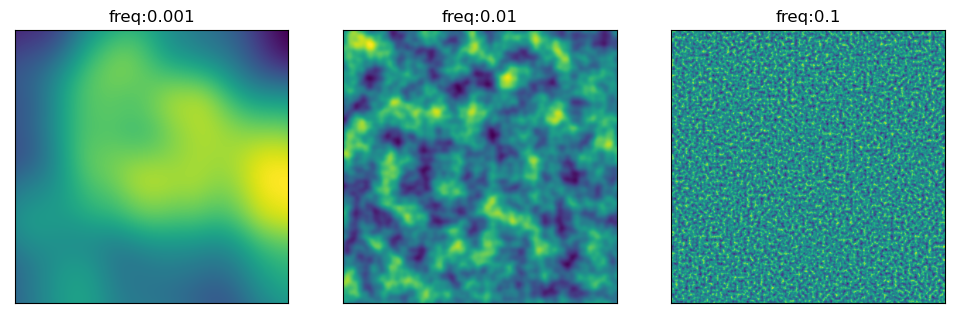

In [28]:

frequencies = [0.001, 0.01, 0.1]
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
axs = ax.ravel()

for idx in range(len(axs)):
    noise = generate_noise_arr((canvas_size, canvas_size), frequency=frequencies[idx], noise_type=noise_type, seed=123)
    axs[idx].imshow(noise)
    axs[idx].xaxis.set_visible(False)
    axs[idx].yaxis.set_visible(False)
    axs[idx].set_title(f"freq:{ frequencies[idx]}")

Varying seed

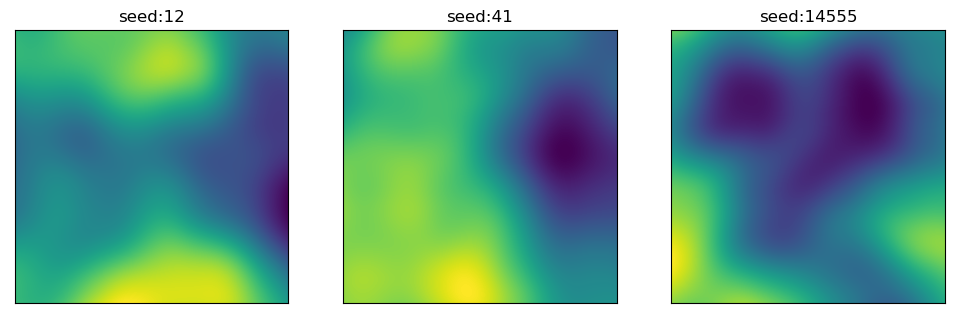

In [32]:
seeds = [12, 41, 14555]
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
axs = ax.ravel()

for idx in range(len(axs)):
    noise = generate_noise_arr((canvas_size, canvas_size), frequency=0.001, noise_type=noise_type, seed=seeds[idx])
    axs[idx].imshow(noise)
    axs[idx].xaxis.set_visible(False)
    axs[idx].yaxis.set_visible(False)
    axs[idx].set_title(f"seed:{ seeds[idx]}")

Varing colormaps

In [33]:
def hexcode_to_rgb(hexcode:str):
    hexcode = hexcode.replace('#', '')
    red = int(hexcode[:2], 16)
    green = int(hexcode[2:4], 16)
    blue = int(hexcode[4:], 16)
    
    return np.array([red, green, blue]) / 256

# newcmp = ListedColormap(newcolors)

In [43]:
def random_colormap():
    return np.random.choice(list(mpl.colormaps._cmaps.keys()))

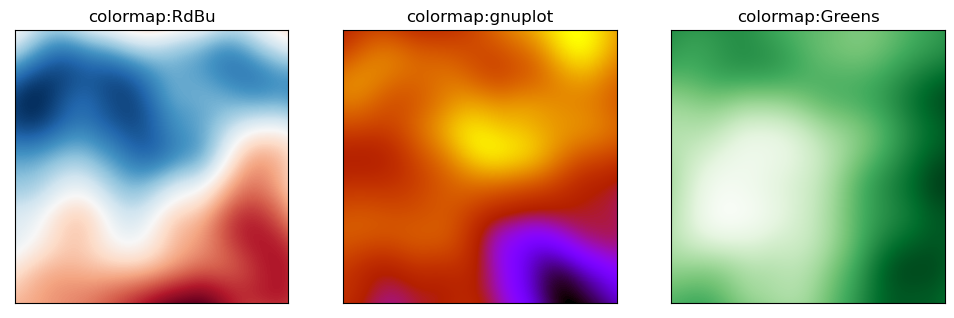

In [46]:
colormaps = [random_colormap() for x in range(3)]

f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
axs = ax.ravel()

for idx in range(len(axs)):
    noise = generate_noise_arr((canvas_size, canvas_size), frequency=0.001, noise_type=noise_type)
    axs[idx].imshow(noise, cmap=colormaps[idx])
    axs[idx].xaxis.set_visible(False)
    axs[idx].yaxis.set_visible(False)
    axs[idx].set_title(f"colormap:{ colormaps[idx]}")

Vary noise generator

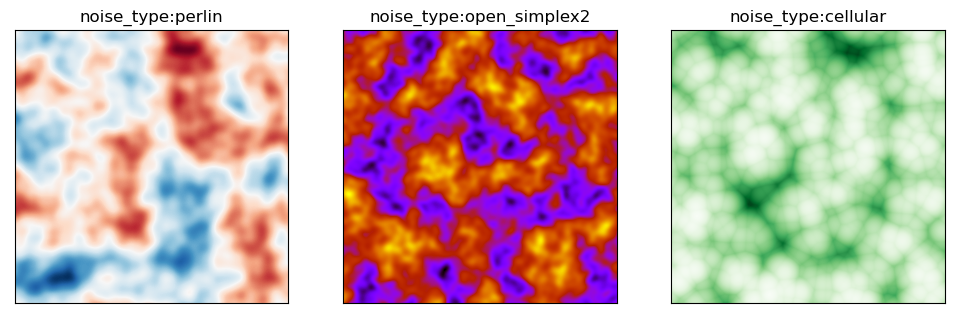

In [49]:
noise_types=['perlin', 'open_simplex2', 'cellular']
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
axs = ax.ravel()

for idx in range(len(axs)):
    noise = generate_noise_arr((canvas_size, canvas_size), frequency=0.005, noise_type=noise_types[idx])
    axs[idx].imshow(noise, cmap=colormaps[idx])
    axs[idx].xaxis.set_visible(False)
    axs[idx].yaxis.set_visible(False)
    axs[idx].set_title(f"noise_type:{ noise_types[idx]}")

In [53]:
 generate_pattern_array((canvas_size, canvas_size), frequency=0.005, pattern=pattern_types[idx])

TypeError: Image data of dtype object cannot be converted to float

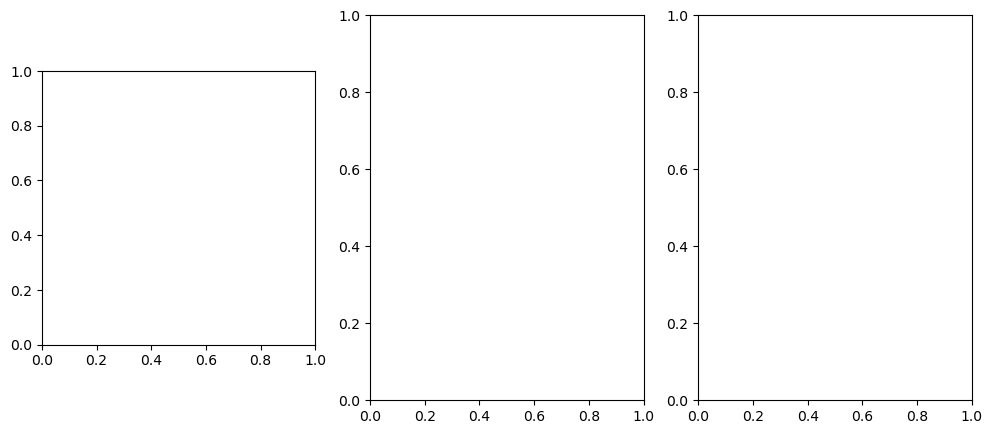

In [52]:
pattern_types=['wave', 'sphere', 'checkerboard']
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
axs = ax.ravel()

for idx in range(len(axs)):
    noise = generate_pattern_array((canvas_size, canvas_size), frequency=0.005, pattern=pattern_types[idx])
    axs[idx].imshow(noise, cmap=colormaps[idx])
    axs[idx].xaxis.set_visible(False)
    axs[idx].yaxis.set_visible(False)
    axs[idx].set_title(f"noise_type:{ pattern_types[idx]}")